In [21]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
df = pd.read_csv("군집 결과-class.csv", index_col=0)

In [17]:
df

,법정동,치안,여가,일반음식점,보건,편의시설,대중교통,카페,술집,군집
0,청운동,2,1,1,1,1,2,1,1,0
1,신교동,2,1,1,1,1,1,1,1,0
2,궁정동,1,1,1,1,1,1,1,1,0
3,효자동,1,1,1,1,1,1,1,1,0
4,창성동,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,3,3,2,3,3,3,3,2,4
461,암사동,3,3,3,3,3,3,3,2,4
462,성내동,3,3,3,3,3,3,3,2,4
463,천호동,3,3,3,3,3,3,3,2,4


In [19]:
df1 = df.drop(axis=1, columns=['법정동', '군집'])

In [94]:
df1

,치안,여가,일반음식점,보건,편의시설,대중교통,카페,술집
0,2,1,1,1,1,2,1,1
1,2,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
460,3,3,2,3,3,3,3,2
461,3,3,3,3,3,3,3,2
462,3,3,3,3,3,3,3,2
463,3,3,3,3,3,3,3,2


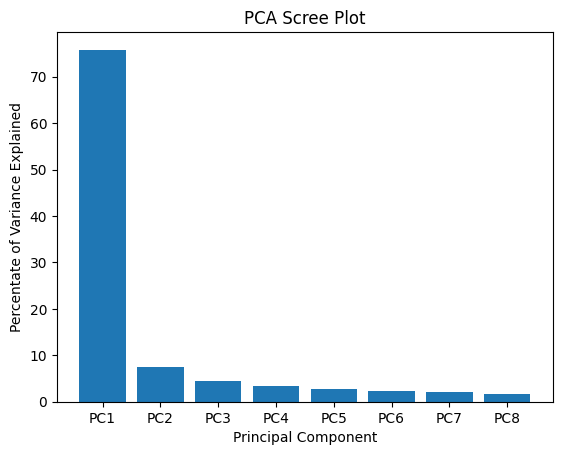

0    0.757996
1    0.833114
2    0.877792
3    0.911196
4    0.938355
5    0.961359
6    0.983391
7    1.000000
dtype: float64

In [22]:
# PCA 주성분분석
pca_test = PCA(random_state=1107)
X_p = pca_test.fit_transform(df1)


percent_variance = np.round(pca_test.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
pd.Series(np.cumsum(pca_test.explained_variance_ratio_))

In [135]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df1)
pcd = pd.DataFrame(pc)
pcd

,0,1
0,-1.881857,0.831773
1,-2.247540,0.624761
2,-2.543448,-0.246328
3,-2.543448,-0.246328
4,-2.543448,-0.246328
...,...,...
460,2.446748,0.383714
461,2.820155,0.157312
462,2.820155,0.157312
463,2.820155,0.157312


In [136]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcd, df['군집'], random_state=30)
X_train.shape, X_test.shape

((348, 2), (117, 2))

In [139]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

array([5, 0, 6, 1, 3, 0, 1, 6, 2, 0, 4, 4, 5, 2, 6, 0, 6, 1, 1, 0, 3, 2,
       2, 4, 0, 1, 0, 6, 6, 4, 3, 0, 2, 4, 5, 5, 0, 4, 1, 0, 0, 0, 0, 3,
       6, 0, 0, 4, 1, 3, 1, 0, 4, 5, 4, 3, 6, 0, 2, 0, 3, 1, 0, 6, 2, 4,
       0, 0, 6, 4, 0, 6, 4, 4, 3, 6, 4, 0, 5, 2, 0, 0, 6, 4, 5, 0, 6, 0,
       4, 0, 3, 0, 0, 1, 0, 4, 4, 3, 0, 3, 0, 5, 4, 0, 5, 4, 4, 1, 4, 4,
       4, 4, 2, 3, 4, 0, 0], dtype=int64)

In [140]:
knn.score(X_test, y_test)

0.8632478632478633

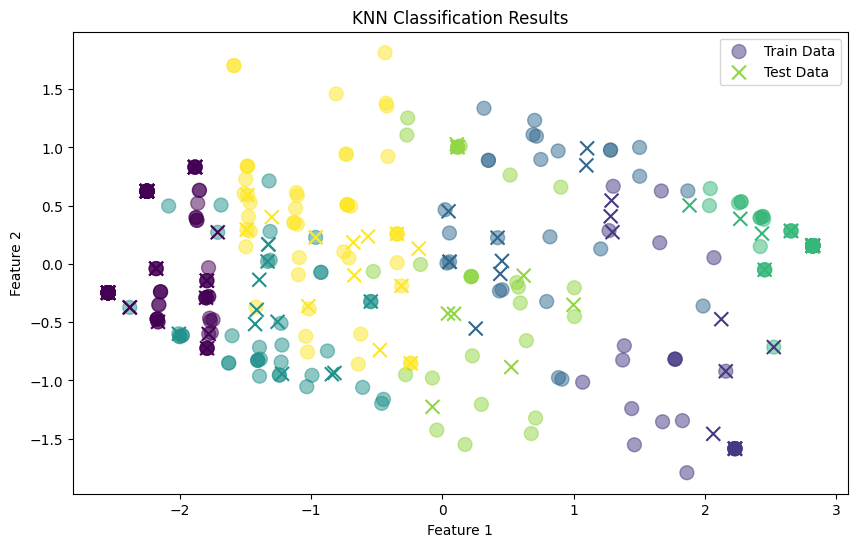

In [141]:
# scatter plot을 사용한 시각화
plt.figure(figsize=(10, 6))
# 학습 데이터 시각화
plt.scatter(X_train[0], X_train[1], c=y_train, marker='o', s=100, alpha=0.5, label='Train Data')
# 테스트 데이터 시각화
plt.scatter(X_test[0], X_test[1], c=pred, marker='x', s=100, label='Test Data')

plt.title('KNN Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [142]:
pcd['label'] = df['군집']

In [149]:
# 새로운 데이터 포인트
new_point = np.array([[3, 3, 2, 3, 3, 3, 3, 2]])  # 새로운 데이터 포인트 예시

# 1. PCA 변환
new_point_pca = pca.transform(new_point)

# 2. KNN 분류하여 라벨 예측
predicted_label = knn.predict(new_point_pca)

# 3. 같은 라벨을 가진 데이터 포인트들 중에서 가장 가까운 5개 선택
# 학습 데이터 중 예측된 라벨에 해당하는 데이터만 필터링
filtered_points = pcd[pcd['label'] == predicted_label[0]]

# NearestNeighbors를 사용하여 거리 계산 및 가장 가까운 5개 포인트 찾기
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(filtered_points.drop(axis=1, columns=['label']))
distances, indices = neigh.kneighbors(new_point_pca)

# 가장 가까운 5개의 데이터 포인트 출력
closest_points = filtered_points.iloc[indices[0]]
print("가장 가까운 5개의 데이터 포인트:", closest_points)

가장 가까운 5개의 데이터 포인트:             0         1  label
460  2.446748  0.383714      4
223  2.440451  0.407789      4
227  2.440451  0.407789      4
406  2.420401  0.397130      4
275  2.420401  0.397130      4


c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [150]:
index = closest_points.index

In [151]:
df.iloc[index]

,법정동,치안,여가,일반음식점,보건,편의시설,대중교통,카페,술집,군집
460,둔촌동,3,3,2,3,3,3,3,2,4
223,제기동,3,3,3,3,3,3,2,2,4
227,청량리동,3,3,3,3,3,3,2,2,4
406,대림동,3,2,3,3,3,3,3,2,4
275,석관동,3,2,3,3,3,3,3,2,4


In [152]:
new_point

array([[3, 3, 2, 3, 3, 3, 3, 2]])